<h2> Importing Important Packages 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

<h2>Importing Dataset that already preprocessed

In [3]:
import pandas as pd
from preprocessing import preprocess
path_to_file = 'data/padi.csv'
province = 'DI YOGYAKARTA'
sliding_window = 3
train_test_proportion = 0.8

data = pd.read_csv(path_to_file)
preprocessed = preprocess(data[data['Provinsi'] == province],\
                            sliding_window)

preprocessed.head()

,0,1,2,3
0,644642,643266,642120,661179
1,643266,642120,661179,647198
2,642120,661179,647198,621605
3,661179,647198,621605,612393
4,647198,621605,612393,654289


<h2> Split Dataset into 2 gourp (train and test test)

In [4]:
train_data = preprocessed[:int(train_test_proportion*len(preprocessed))]
test_data = preprocessed.drop(train_data.index)

train_labels = train_data.pop(train_data.columns[-1])
test_labels = test_data.pop(test_data.columns[-1])

<h2> make Modeling function

In [4]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation=tf.nn.relu,
                     input_shape=[len(train_data.keys())]),
        layers.Dense(64, activation=tf.nn.relu),
        layers.Dense(1)
    ])

    optimizer = tf.optimizers.RMSprop(0.001)

    model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])

    return model

In [5]:
model = build_model()

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                256       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,481
Trainable params: 4,481
Non-trainable params: 0
_________________________________________________________________


<h2> Train Regression model 

In [6]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0:
            print('')
        print('.', end='')

epochs = 1000

history = model.fit(train_data, train_labels, epochs=epochs, validation_split=0.2, verbose=0, callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

<h2> Plotting Training Process

In [7]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

#Show last Epoch matrics result
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,695167296.0,23348.035156,695167296.0,2.902633e+09,37170.515625,2.902633e+09,995
996,706582656.0,21234.683594,706582656.0,1.980024e+09,37482.375000,1.980024e+09,996
997,689948160.0,23283.156250,689948160.0,2.874786e+09,36932.718750,2.874786e+09,997
998,693101504.0,21026.677734,693101504.0,1.993349e+09,37399.484375,1.993349e+09,998
999,676095424.0,23018.396484,676095424.0,2.847766e+09,36682.125000,2.847766e+09,999


In [18]:
def ploting_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error (Target)')
    plt.plot(hist['epoch'], hist['mae'], label='Train Error')
    plt.plot(hist['epoch'], hist['mae'], label='Val Error')
    plt.legend()
    plt.ylim([0, 5])

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error (Target^2)')
    plt.plot(hist['epoch'], hist['mae'], label='Train Error')
    plt.plot(hist['epoch'], hist['mae'], label='Val Error')
    plt.legend()
    plt.ylim([0, 20])

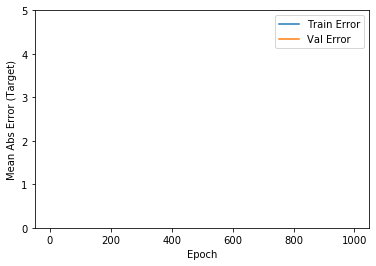

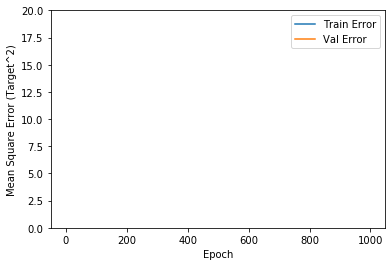

In [19]:
ploting_history(history)

<h2> Checking Evaluation metrics model

In [20]:
    __, mae, __ = model.evaluate(test_data, test_labels, verbose=0)
    print("Test Set Mean Abs Error : {:5.2f} Comodity in ton".format(mae))

Test Set Mean Abs Error : 62129.06 Comodity in ton


<h2> Predicting Test data

In [22]:
predict_result = model.predict(test_data).flatten()

predicted_vs_actual = pd.DataFrame(list(zip(predict_result, test_labels.tolist())), 
               columns =['Prediction','Actual'])

predicted_vs_actual

,Prediction,Actual
0,699025.875,798232
1,817882.000,842934
